In [1]:
# import numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# import matplotlib and seaborn for data visulization
import matplotlib.pyplot as plt
import seaborn as sns

# import os to read system directory
import os

# import re for string manipulation
import re

# import StratifiedKFold for cross validation
from sklearn.model_selection import StratifiedKFold

# import MinMaxScaler to normalize the data and OneHotEncoder to encode the categorical features as one-hot numeric arrays
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# set the size of output figures
plt.rcParams['figure.figsize'] = 8, 6

In [3]:
# get the current working directory
path = os.getcwd()
# read the training data
train_data_full = pd.read_csv(path+'/train.csv')
# display the first 10 rows of the training data
train_data_full.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# get an overview of the training data
train_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# change the PassengerId to object type
train_data_full.PassengerId = train_data_full.PassengerId.astype('object')

In [6]:
# define a function to evaluate the distribution and corresponding survival rate for different features
def single_column_stats(column_name):
    dist = train_data_full[column_name].value_counts() / train_data_full[column_name].value_counts().sum()
    rate = train_data_full.groupby(column_name)['Survived'].value_counts()[:, 1] / train_data_full[column_name].value_counts()
    sns.barplot(x=rate.index, y=rate)
    plt.xlabel(column_name)
    plt.ylabel('Survival Rate')
    return pd.DataFrame([dist, rate], index=['Percentage', 'Survival Rate'])

,1,2,3
Percentage,0.242424,0.206510,0.551066
Survival Rate,0.629630,0.472826,0.242363


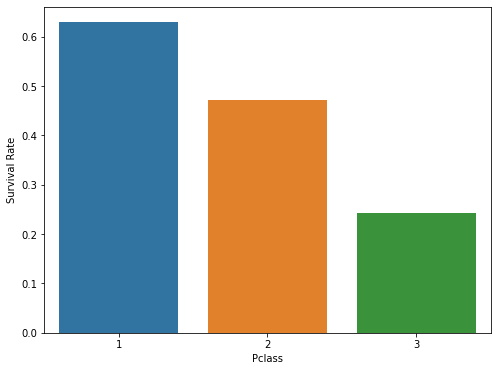

In [7]:
# results for feature 'Pclass'
single_column_stats('Pclass')

,male,female
Percentage,0.647587,0.352413
Survival Rate,0.188908,0.742038


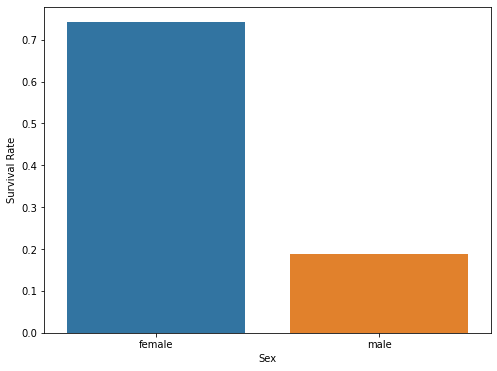

In [8]:
# results for feature 'Sex'
single_column_stats('Sex')

,0,1,2,3,4,5,8
Percentage,0.682379,0.234568,0.031425,0.017957,0.020202,0.005612,0.007856
Survival Rate,0.345395,0.535885,0.464286,0.250000,0.166667,NaN,NaN


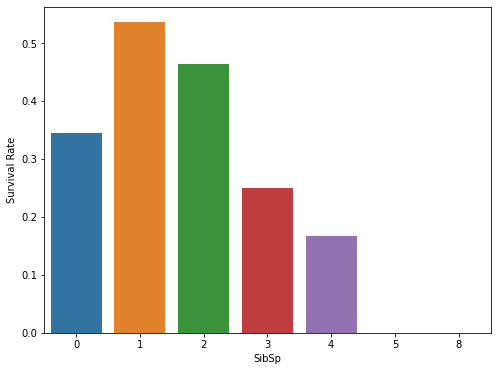

In [9]:
# results for feature 'SibSp'
single_column_stats('SibSp')

,0,1,2,3,4,5,6
Percentage,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122
Survival Rate,0.343658,0.550847,0.500000,0.600000,NaN,0.200000,NaN


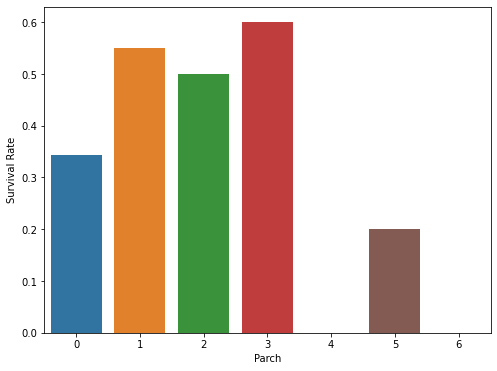

In [10]:
# results for feature 'Parch'
single_column_stats('Parch')

,S,C,Q
Percentage,0.724409,0.188976,0.086614
Survival Rate,0.336957,0.553571,0.389610


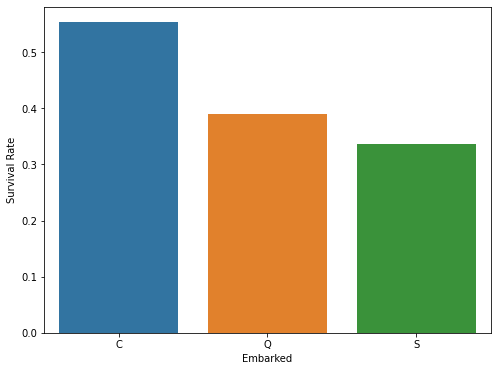

In [11]:
# results for feature 'Embarked'
single_column_stats('Embarked')

In [12]:
# retrieve the title of each passenger from feature 'Name'
train_data_full['Title'] = np.zeros(train_data_full.shape[0])
for i in range(train_data_full.shape[0]):
    train_data_full['Title'][i] = re.findall(r'\b\w*\.', train_data_full['Name'][i])[0]

,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Major.,Col.,Mlle.,Mme.,Lady.,Don.,Countess.,Jonkheer.,Capt.,Ms.,Sir.
Percentage,0.580247,0.204265,0.140292,0.044893,0.007856,0.006734,0.002245,0.002245,0.002245,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122
Survival Rate,0.156673,0.697802,0.792000,0.575000,0.428571,NaN,0.500000,0.500000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000


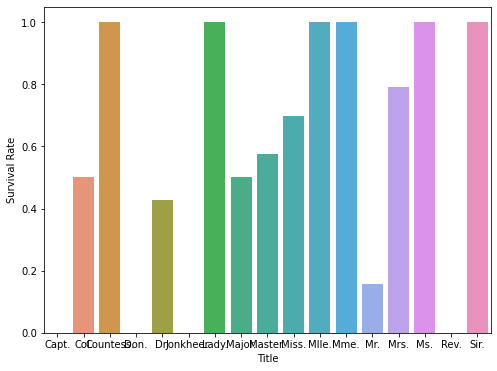

In [13]:
# results for feature 'Title'
single_column_stats('Title')

In [14]:
# Split the features and target from the training data
X_full = train_data_full.drop(columns=['Survived'])
y_full = train_data_full.Survived

In [ ]:
# the training data contains both numerical and categorical data, from which we can see there are missing values for features 'Age', 'Cabin' and 'Embarked'. In the following we will deal with these missing values. Notice that feature 'Cabin' contains more than 50% missing values. Thus we will drop this feature later.

In [15]:
# impute the missing Age using the median age of the people with the same title
for i in range(X_full.shape[0]):
    if np.isnan(X_full.Age[i]):
        title = X_full.Title[i]
        X_full.Age[i] = X_full.groupby('Title')['Age'].median()[title]

In [16]:
# impute the missing Embarked using the most frequent embarked location
for i in range(X_full.shape[0]):
    if X_full.Embarked[i] != 'S' and X_full.Embarked[i] != 'Q' and X_full.Embarked[i] != 'C':
        X_full.Embarked[i] = X_full.Embarked.value_counts().index[0]

In [17]:
# find those features which contains more than 50% missing values and then drop those features
drop_cols = [col for col in X_full.columns if X_full[col].isnull().sum()/len(X_full[col]) > 0.5]
X_full = X_full.drop(columns=drop_cols)
print(drop_cols)

['Cabin']


In [18]:
# check if there is no missing value
X_full.isnull().sum().sum() + y_full.isnull().sum().sum() == 0

True

In [19]:
# find the numerical columns
numerical_columns = [col for col in X_full.columns if X_full[col].dtype in ['int64', 'float64']]
print(numerical_columns)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [20]:
# find the categorical columns
categorical_columns = [col for col in X_full.columns if X_full[col].dtype=='object']
print(categorical_columns)

['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked', 'Title']


In [21]:
# drop those features with high cardinality. e.g. more than 100 unique values for a given feature
categorical_columns = [col for col in categorical_columns if pd.Series(X_full[col].unique()).value_counts().sum() <= 20]
print(categorical_columns)

['Sex', 'Embarked', 'Title']


In [22]:
# combine the numerical features and categorical features
my_cols = numerical_columns + categorical_columns
print(my_cols)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Title']


In [23]:
# get a copy of X_train for the selected features
X_train = X_full[my_cols].copy()

In [24]:
# split X_train as categorical and numerical parts
X_train_cat = X_train[categorical_columns]
X_train_num = X_train[numerical_columns]

In [25]:
# create a one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [26]:
# encode the categorical features as one-hot arrays
X_train_cat_oh = OH_encoder.fit_transform(X_train_cat)
OH_column_names = OH_encoder.get_feature_names(categorical_columns)

In [27]:
# transform them into DataFrame
X_train_cat_OH = pd.DataFrame(X_train_cat_oh, columns=OH_column_names, index=X_train.index)

In [28]:
# get an overview of the columns name for the one-hot arrays
X_train_cat_OH.columns

Index(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Capt.', 'Title_Col.', 'Title_Countess.', 'Title_Don.',
       'Title_Dr.', 'Title_Jonkheer.', 'Title_Lady.', 'Title_Major.',
       'Title_Master.', 'Title_Miss.', 'Title_Mlle.', 'Title_Mme.',
       'Title_Mr.', 'Title_Mrs.', 'Title_Ms.', 'Title_Rev.', 'Title_Sir.'],
      dtype='object')

In [29]:
# drop the collinear features
drop_cols_OH = ['Sex_male', 'Embarked_S', 'Title_Mr.']
X_train_cat_OH.drop(drop_cols_OH, inplace=True, axis=1)

In [30]:
# combine the numerical and categorical features
X_train_OH = pd.concat([X_train_num, X_train_cat_OH], axis=1)

In [31]:
# print the shapes of the training sets
print(X_train_OH.shape, y_full.shape)

(891, 24) (891,)


In [32]:
# normalize the data to the range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_final = scaler.fit_transform(X_train_OH)

In [33]:
# convert y to one-dimensional array
y_train_final = np.array(y_full).reshape((-1, ))

In [34]:
# create a model for classification problem
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train_final.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [35]:
# define a 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [36]:
cv_scores = []
for train, valid in kfold.split(X_train_final, y_train_final):
    # fit the model
    history = model.fit(X_train_final[train], y_train_final[train], epochs=30, batch_size=10, verbose=0)

    # evaluate the model
    scores = model.evaluate(X_train_final[valid], y_train_final[valid], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

    cv_scores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_scores), np.std(cv_scores)))

binary_accuracy: 82.22%
binary_accuracy: 82.02%
binary_accuracy: 86.52%
binary_accuracy: 83.15%
binary_accuracy: 79.78%
binary_accuracy: 82.02%
binary_accuracy: 88.76%
binary_accuracy: 80.90%
binary_accuracy: 84.27%
binary_accuracy: 84.27%
83.39% (+/- 2.54%)


In [37]:
# read the test data
test_data_full = pd.read_csv(path+'/test.csv')

In [38]:
# get an overview of the testing data
test_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [39]:
# retrieve the titles of the passagers and assign them as new feature 'title'
test_data_full['Title'] = np.zeros(test_data_full.shape[0])
for i in range(test_data_full.shape[0]):
    test_data_full['Title'][i] = re.findall(r'\b\w*\.', test_data_full['Name'][i])[0]

In [40]:
# impute the missing Age using the median age of the people with the same title
for i in range(test_data_full.shape[0]):
    if np.isnan(test_data_full.Age[i]):
        title_test = test_data_full.Title[i]
        test_data_full.Age[i] = train_data_full.groupby('Title')['Age'].median()[title_test]

In [41]:
# impute the missing Fare using the median fare of the people with the same Pclass
for i in range(test_data_full.shape[0]):
    if np.isnan(test_data_full.Fare[i]):
        pclass_test = test_data_full.Pclass[i]
        test_data_full.Fare[i] = train_data_full.groupby('Pclass')['Fare'].median()[pclass_test]

In [42]:
# split the testing data as categorical and numerical parts
X_test_cat = test_data_full[categorical_columns]
X_test_num = test_data_full[numerical_columns]

In [43]:
# encode the categorical features as one-hot arrays
X_test_cat_OH = pd.DataFrame(OH_encoder.transform(X_test_cat), columns=OH_column_names)

In [44]:
# drop the collinear features
X_test_cat_OH.drop(drop_cols_OH, inplace=True, axis=1)

In [45]:
# combine the numerical and categorical features as a single DataFrame
X_test_OH = pd.concat([X_test_num, X_test_cat_OH], axis=1)

In [46]:
# normalize the test data
X_test_final = scaler.transform(X_test_OH)

In [47]:
# retrieve the passengers' Id
Id = test_data_full['PassengerId']

In [49]:
# use the best model to predict the result for the test data
y_test = model.predict_classes(X_test_final)

In [50]:
res = pd.DataFrame(y_test.flatten(), columns=['Survived'])

In [51]:
# export the result as a csv file
pd.concat([Id, res], axis=1).to_csv('predictions.csv', index=False)